# Elementary Cellular Automaton

This notebook implements Stephen Wolfram's elementary cellular automaton based on the [Wikipedia article](https://en.wikipedia.org/wiki/Elementary_cellular_automaton).

## Overview

Elementary cellular automaton is a one-dimensional cellular automaton with two possible states (0 and 1) and a rule that determines the state of a cell in the next generation based on the current state of the cell and its two immediate neighbors.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from typing import List, Tuple


## Step 1: Get Rule by Number

According to the [Wolfram code](https://en.wikipedia.org/wiki/Wolfram_code), each rule is numbered from 0 to 255. The rule number encodes the outputs for all 8 possible configurations of a cell and its two neighbors.

The configurations are ordered as: 111, 110, 101, 100, 011, 010, 001, 000

For example, Rule 30 (binary: 00011110) means:
- 111 → 0
- 110 → 0
- 101 → 0
- 100 → 1
- 011 → 1
- 010 → 1
- 001 → 1
- 000 → 0


In [3]:
def get_rule_from_number(rule_number: int) -> dict:
    """
    Convert a rule number (0-255) to its corresponding rule mapping.
    
    Args:
        rule_number: Integer from 0 to 255
        
    Returns:
        Dictionary mapping 3-bit configurations to their output values
    """
    if not 0 <= rule_number <= 255:
        raise ValueError("Rule number must be between 0 and 255")
    
    # Convert rule number to 8-bit binary representation
    binary_rule = format(rule_number, '08b')
    
    # Create mapping for all 8 possible configurations
    configurations = ['111', '110', '101', '100', '011', '010', '001', '000']
    rule_mapping = {}
    
    for i, config in enumerate(configurations):
        # The binary representation gives us the output for each configuration
        rule_mapping[config] = int(binary_rule[i])
    
    return rule_mapping

# Test with Rule 30
rule_30 = get_rule_from_number(30)
print("Rule 30 mapping:")
for config, output in rule_30.items():
    print(f"{config} → {output}")


Rule 30 mapping:
111 → 0
110 → 0
101 → 0
100 → 1
011 → 1
010 → 1
001 → 1
000 → 0


## Step 2: Visualize Rules

Now let's visualize the rule using black and white squares to show the transformation for each configuration.


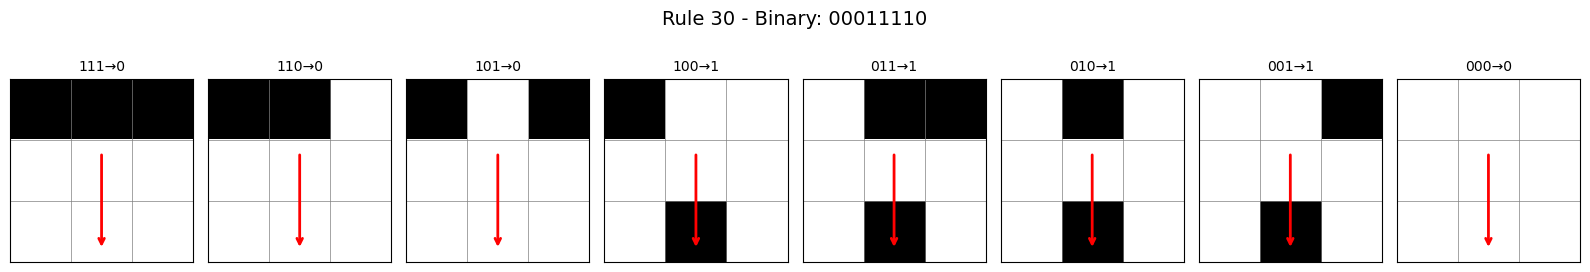

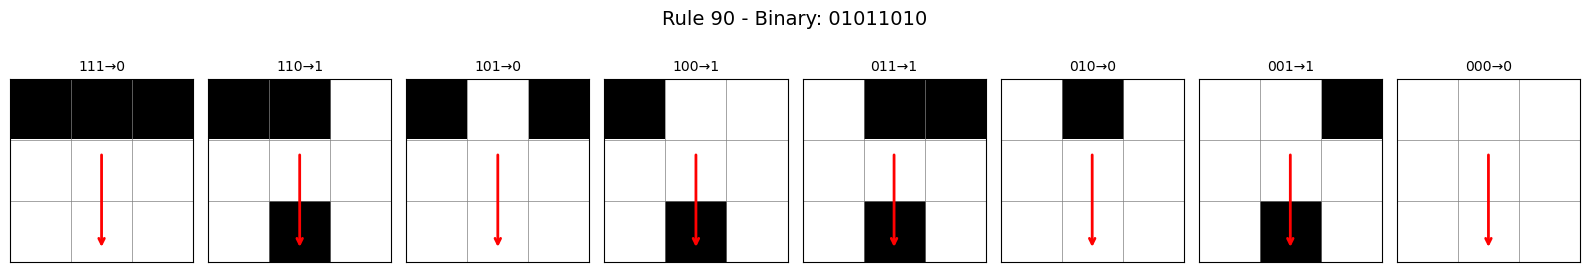

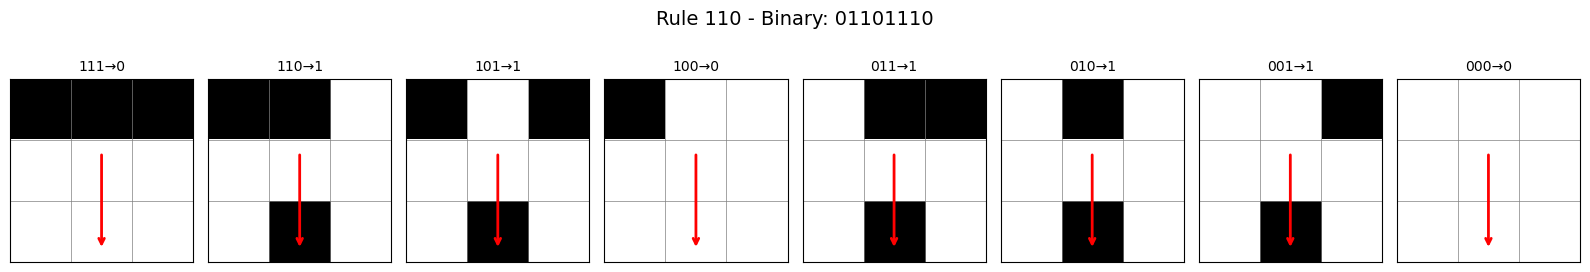

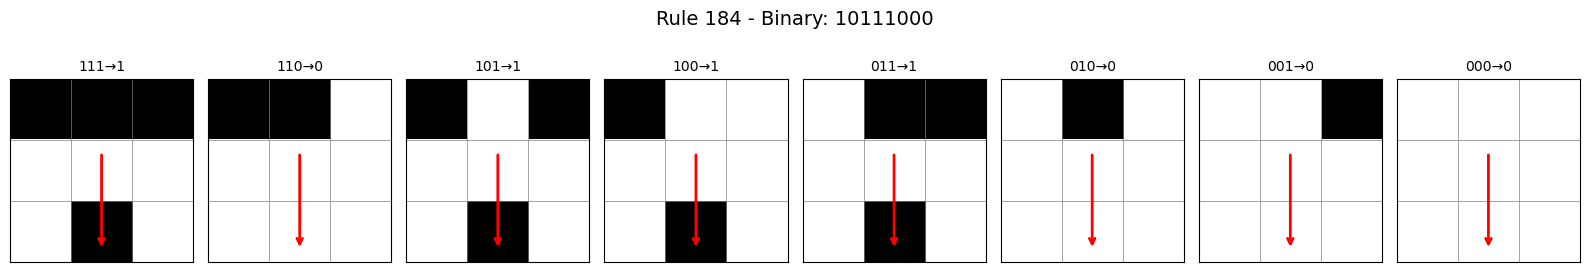

In [4]:
def visualize_rule(rule_number: int):
    """
    Visualize a rule by showing the transformation for each configuration.
    Black squares represent 1, white squares represent 0.
    """
    rule_mapping = get_rule_from_number(rule_number)
    configurations = ['111', '110', '101', '100', '011', '010', '001', '000']
    
    fig, axes = plt.subplots(1, 8, figsize=(16, 3))
    fig.suptitle(f'Rule {rule_number} - Binary: {format(rule_number, "08b")}', fontsize=14)
    
    cmap = colors.ListedColormap(['white', 'black'])
    
    for i, (ax, config) in enumerate(zip(axes, configurations)):
        # Create input configuration (3x3 grid with the configuration in the middle row)
        input_grid = np.zeros((3, 3))
        for j, bit in enumerate(config):
            input_grid[0, j] = int(bit)
        
        # Show the result in the middle cell of the bottom row
        output_grid = np.zeros((3, 3))
        output_grid[2, 1] = rule_mapping[config]
        
        # Combine input and output for visualization
        combined_grid = input_grid.copy()
        combined_grid[2, 1] = rule_mapping[config]
        
        # Draw the grid
        ax.imshow(combined_grid, cmap=cmap, vmin=0, vmax=1)
        
        # Add grid lines
        for x in range(4):
            ax.axhline(x - 0.5, color='gray', linewidth=0.5)
            ax.axvline(x - 0.5, color='gray', linewidth=0.5)
        
        # Add arrow to show transformation
        ax.annotate('', xy=(1, 2.3), xytext=(1, 0.7),
                   arrowprops=dict(arrowstyle='->', color='red', lw=2))
        
        ax.set_title(f'{config}→{rule_mapping[config]}', fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

# Visualize Rule 30
visualize_rule(30)

# Visualize a few other interesting rules
for rule_num in [90, 110, 184]:
    visualize_rule(rule_num)


## Step 3: Generate Cellular Automaton Simulations

Now let's implement the simulation function that takes a rule, an initial state, and the number of steps to generate the evolution of the cellular automaton.


In [5]:
def simulate_cellular_automaton(rule_number: int, initial_state: np.ndarray, n_steps: int) -> np.ndarray:
    """
    Simulate an elementary cellular automaton.
    
    Args:
        rule_number: The rule number (0-255)
        initial_state: 1D numpy array of 0s and 1s representing the initial state
        n_steps: Number of time steps to simulate
        
    Returns:
        2D numpy array where each row represents a time step
    """
    rule_mapping = get_rule_from_number(rule_number)
    width = len(initial_state)
    
    # Initialize the grid
    grid = np.zeros((n_steps + 1, width), dtype=int)
    grid[0] = initial_state
    
    # Apply the rule for each time step
    for t in range(n_steps):
        for i in range(width):
            # Get the configuration of the cell and its neighbors
            # Use periodic boundary conditions (wrap around)
            left = grid[t, (i - 1) % width]
            center = grid[t, i]
            right = grid[t, (i + 1) % width]
            
            # Get the configuration as a string
            config = f'{left}{center}{right}'
            
            # Apply the rule
            grid[t + 1, i] = rule_mapping[config]
    
    return grid

# Test the simulation with a simple initial state
width = 101
initial_state = np.zeros(width, dtype=int)
initial_state[width // 2] = 1  # Single cell in the middle

# Simulate Rule 30 for 50 steps
result = simulate_cellular_automaton(30, initial_state, 50)
print(f"Simulation shape: {result.shape}")
print(f"First row (initial state): {result[0, 48:53]}")  # Show middle 5 cells
print(f"Last row: {result[-1, 48:53]}")  # Show middle 5 cells


Simulation shape: (51, 101)
First row (initial state): [0 0 1 0 0]
Last row: [1 0 0 1 0]


## Step 4: Visualize Simulation Results

Finally, let's create a function to visualize the simulation results as a grid of black and white squares.


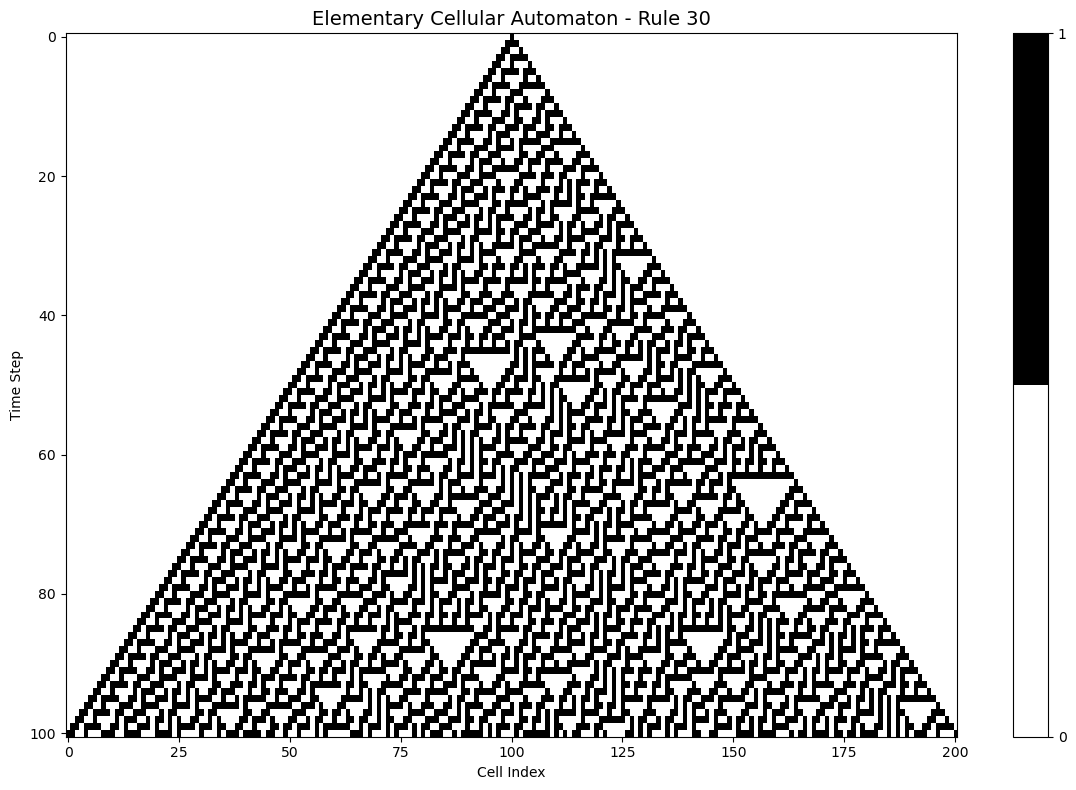

In [6]:
def visualize_simulation(grid: np.ndarray, rule_number: int = None, title: str = None):
    """
    Visualize the cellular automaton evolution as a grid of black and white squares.
    
    Args:
        grid: 2D numpy array where each row is a time step
        rule_number: Optional rule number for the title
        title: Optional custom title
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Use black and white colormap
    cmap = colors.ListedColormap(['white', 'black'])
    
    # Display the grid
    im = ax.imshow(grid, cmap=cmap, interpolation='nearest', aspect='auto')
    
    # Set title
    if title:
        ax.set_title(title, fontsize=14)
    elif rule_number is not None:
        ax.set_title(f'Elementary Cellular Automaton - Rule {rule_number}', fontsize=14)
    
    ax.set_xlabel('Cell Index')
    ax.set_ylabel('Time Step')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, ticks=[0, 1])
    cbar.ax.set_yticklabels(['0', '1'])
    
    plt.tight_layout()
    plt.show()

# Visualize Rule 30 with single cell initial condition
width = 201
initial_state = np.zeros(width, dtype=int)
initial_state[width // 2] = 1

result = simulate_cellular_automaton(30, initial_state, 100)
visualize_simulation(result, rule_number=30)


## Examples with Different Rules and Initial Conditions

Let's explore some interesting rules and different initial conditions.


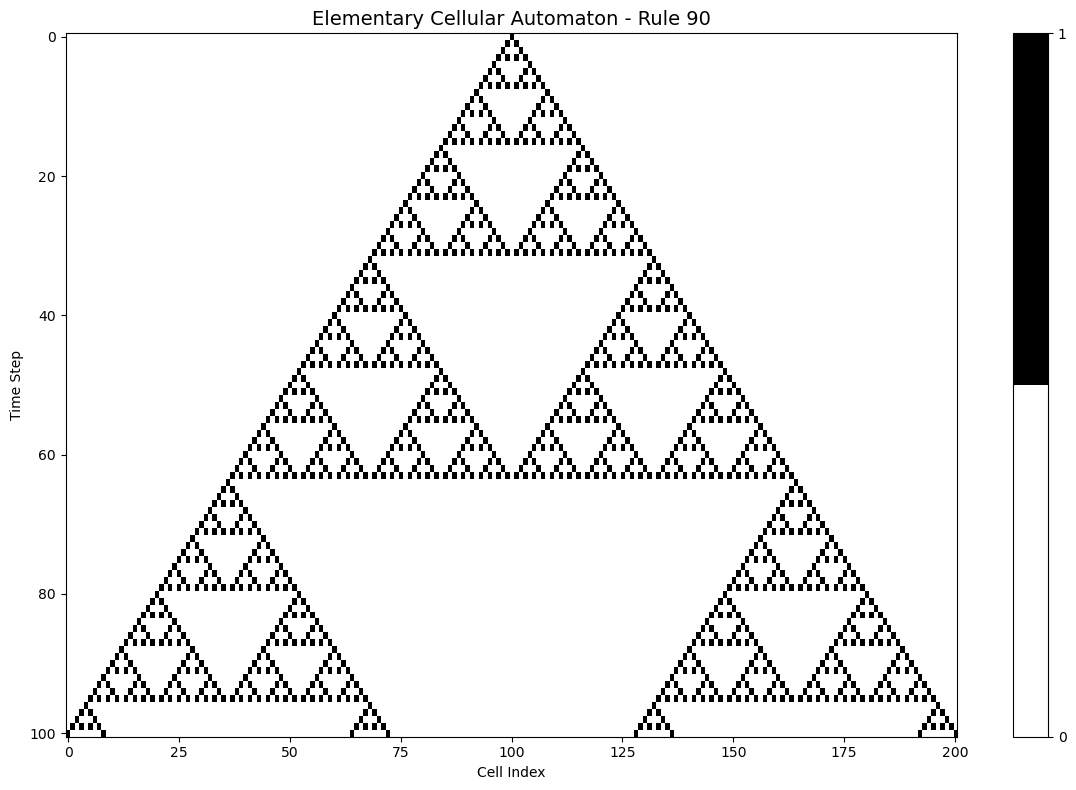

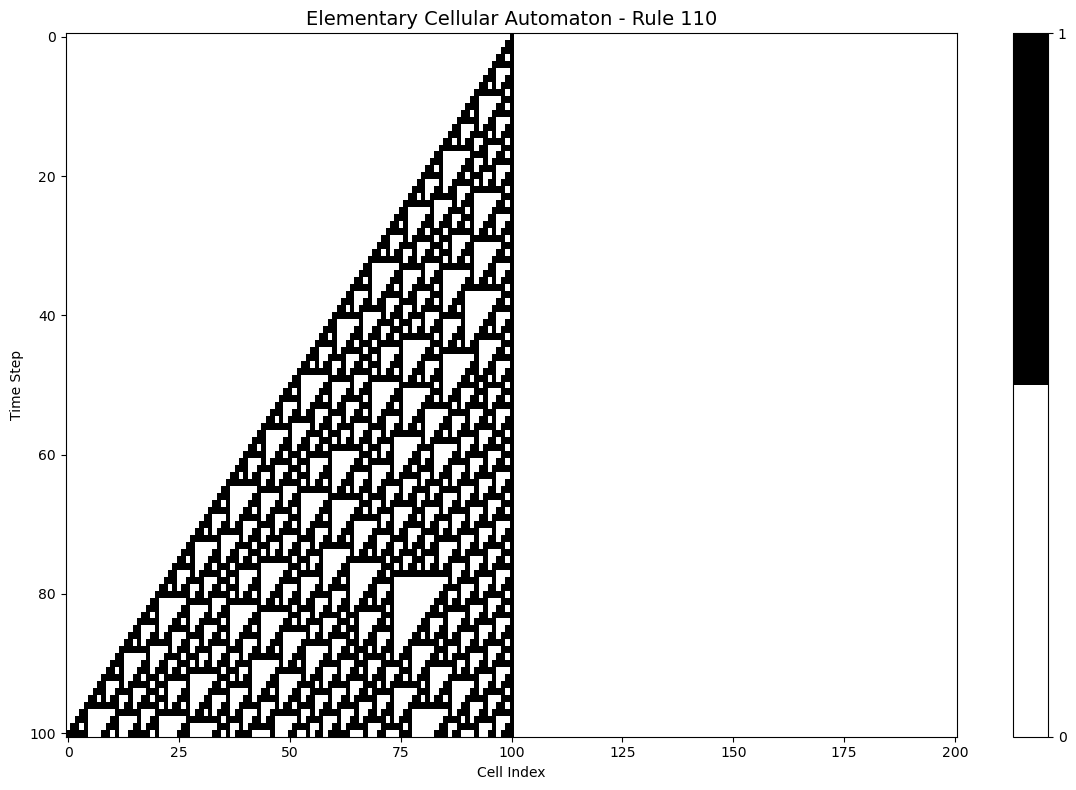

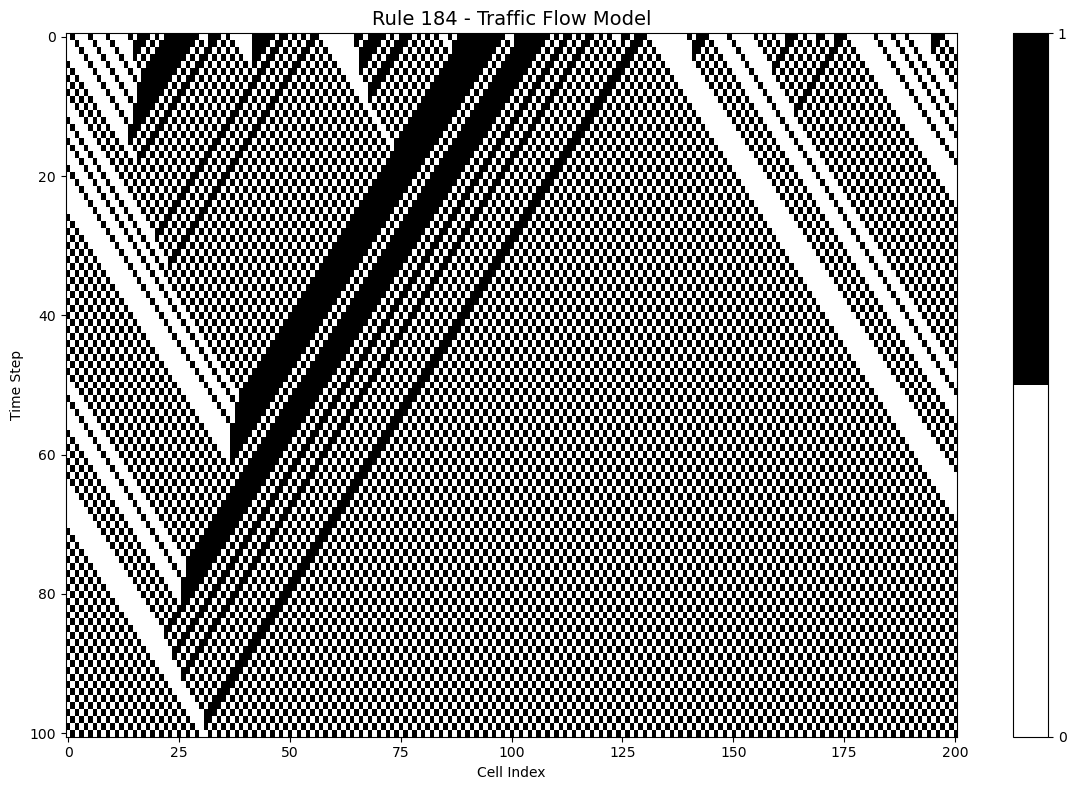

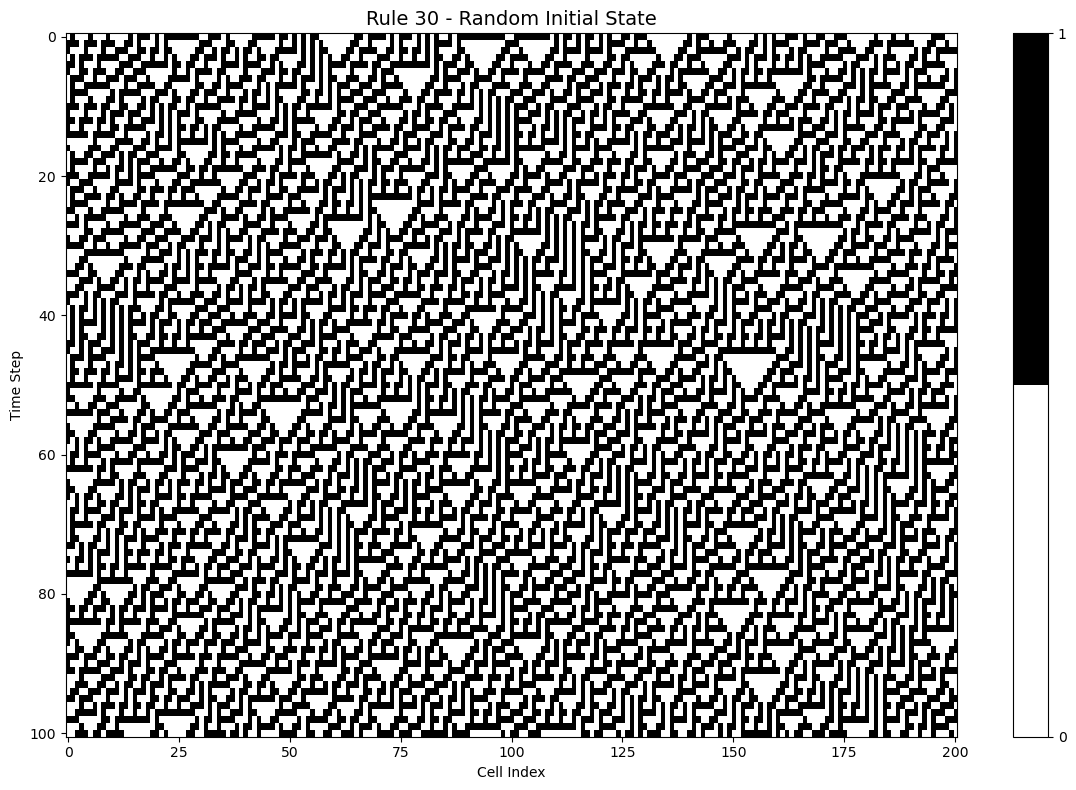

In [7]:
# Example 1: Rule 90 (Sierpinski triangle pattern)
width = 201
initial_state = np.zeros(width, dtype=int)
initial_state[width // 2] = 1

result_90 = simulate_cellular_automaton(90, initial_state, 100)
visualize_simulation(result_90, rule_number=90)

# Example 2: Rule 110 (known to be Turing complete)
result_110 = simulate_cellular_automaton(110, initial_state, 100)
visualize_simulation(result_110, rule_number=110)

# Example 3: Rule 184 (traffic flow model)
# Random initial state
np.random.seed(42)
random_initial = np.random.randint(0, 2, size=width)

result_184 = simulate_cellular_automaton(184, random_initial, 100)
visualize_simulation(result_184, rule_number=184, title="Rule 184 - Traffic Flow Model")

# Example 4: Rule 30 with random initial state
result_30_random = simulate_cellular_automaton(30, random_initial, 100)
visualize_simulation(result_30_random, rule_number=30, title="Rule 30 - Random Initial State")


## Interactive Example

Here's a function that allows you to easily experiment with different rules and initial conditions:


Rule 73 - Creates interesting symmetric patterns


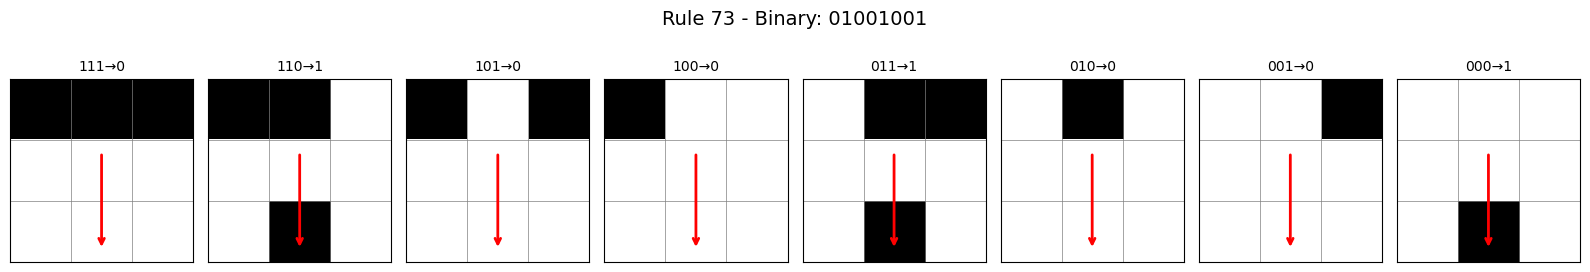

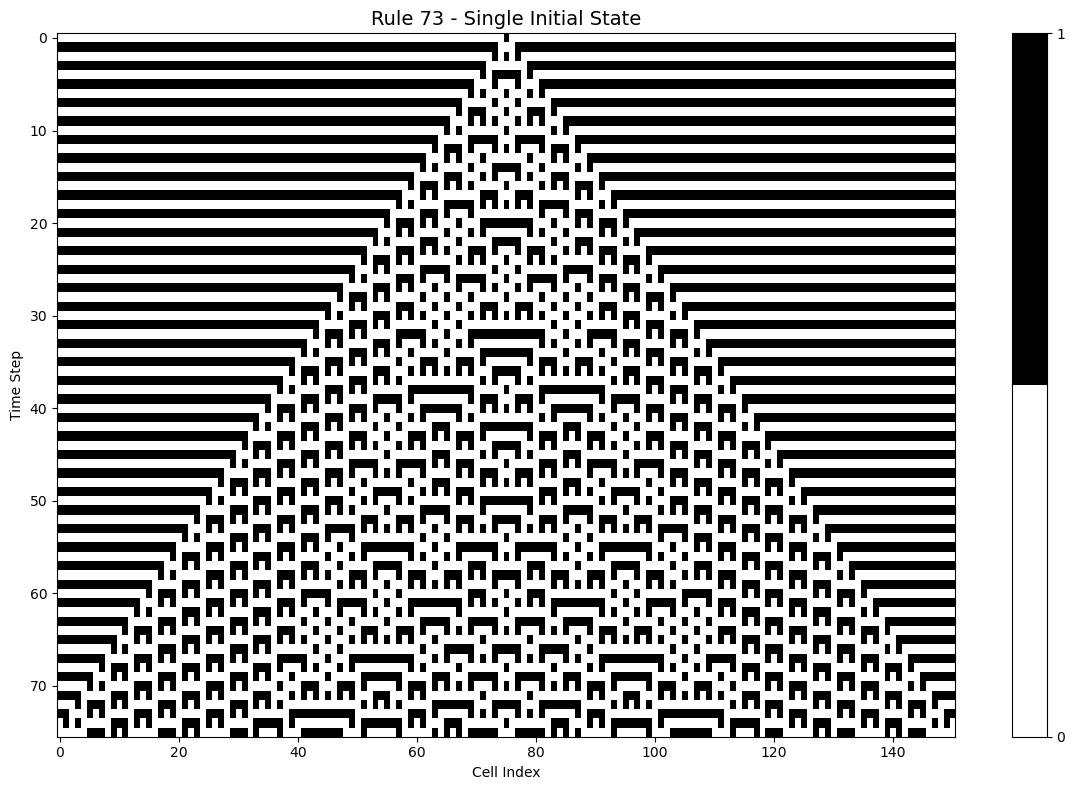


Rule 150 - XOR rule, creates triangular patterns


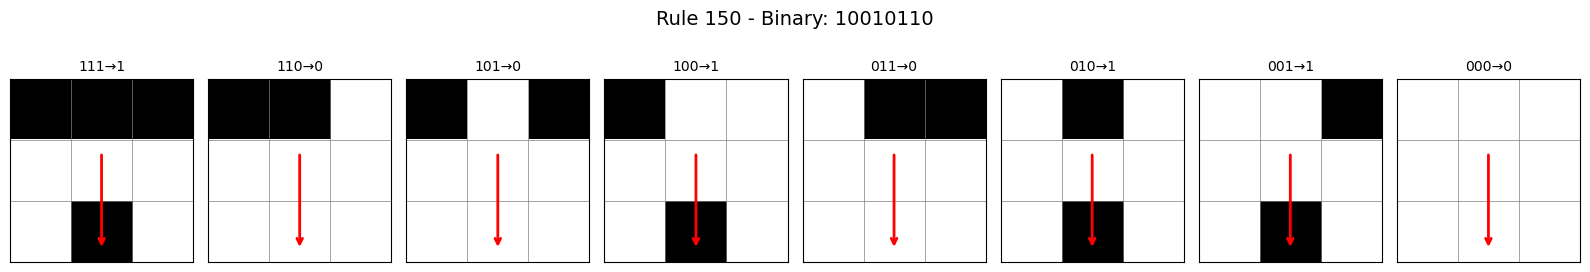

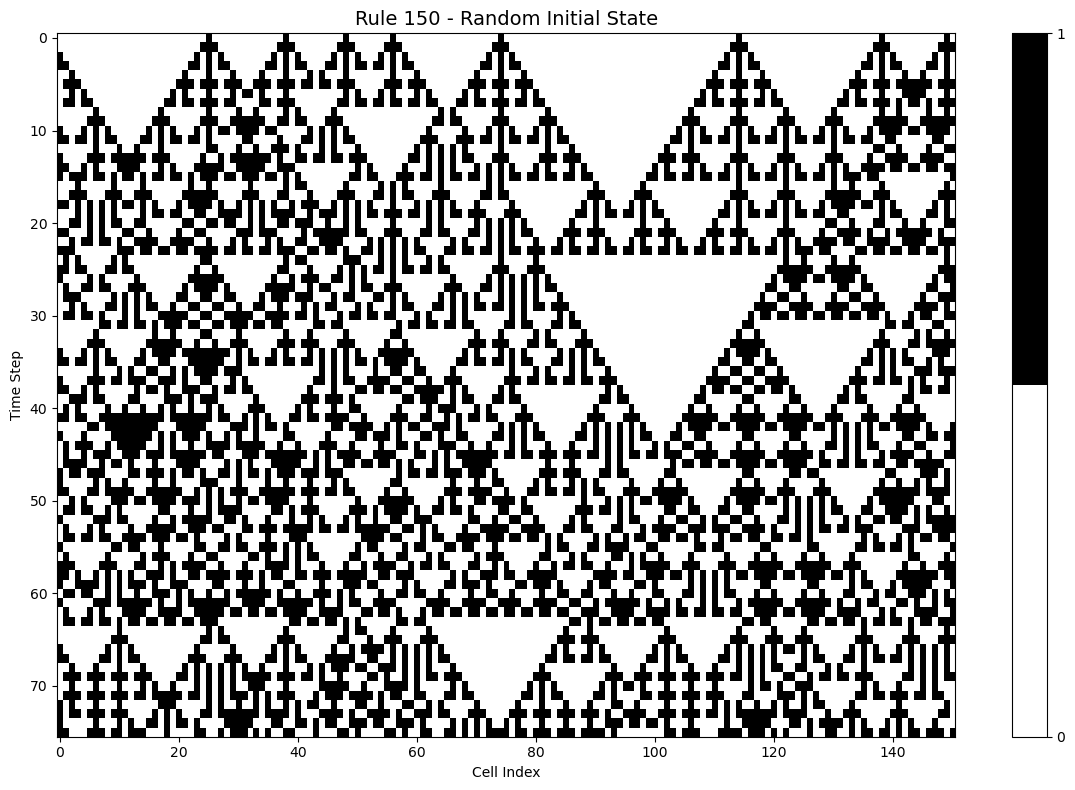

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1]])

In [8]:
def experiment_with_ca(rule_number: int, 
                      width: int = 201, 
                      n_steps: int = 100,
                      initial_type: str = 'single',
                      density: float = 0.5,
                      show_rule: bool = True):
    """
    Experiment with elementary cellular automaton.
    
    Args:
        rule_number: Rule number (0-255)
        width: Width of the automaton
        n_steps: Number of time steps
        initial_type: 'single', 'random', or 'custom'
        density: Density of 1s for random initial state (0-1)
        show_rule: Whether to show the rule visualization
    """
    # Show the rule if requested
    if show_rule:
        visualize_rule(rule_number)
    
    # Create initial state based on type
    if initial_type == 'single':
        initial_state = np.zeros(width, dtype=int)
        initial_state[width // 2] = 1
    elif initial_type == 'random':
        initial_state = (np.random.random(width) < density).astype(int)
    else:
        # Custom pattern - alternating 0s and 1s
        initial_state = np.array([i % 2 for i in range(width)])
    
    # Run simulation
    result = simulate_cellular_automaton(rule_number, initial_state, n_steps)
    
    # Visualize
    title = f"Rule {rule_number} - {initial_type.capitalize()} Initial State"
    visualize_simulation(result, title=title)
    
    return result

# Try some interesting combinations
print("Rule 73 - Creates interesting symmetric patterns")
experiment_with_ca(73, width=151, n_steps=75)

print("\nRule 150 - XOR rule, creates triangular patterns")
experiment_with_ca(150, width=151, n_steps=75, initial_type='random', density=0.1)


## Summary

This notebook implements Stephen Wolfram's elementary cellular automaton with the following features:

1. **Rule Generation**: Convert rule numbers (0-255) to their corresponding transformation mappings
2. **Rule Visualization**: Display rules as black and white squares showing input-output transformations
3. **Simulation**: Generate cellular automaton evolution given a rule, initial state, and number of steps
4. **Visualization**: Display simulation results as grids of black and white squares

### Key Functions:
- `get_rule_from_number(rule_number)`: Convert rule number to mapping dictionary
- `visualize_rule(rule_number)`: Show the rule's transformations visually
- `simulate_cellular_automaton(rule_number, initial_state, n_steps)`: Run the simulation
- `visualize_simulation(grid, rule_number, title)`: Display simulation results
- `experiment_with_ca(...)`: Easy experimentation with different parameters

### Some Interesting Rules:
- **Rule 30**: Chaotic behavior, used in random number generation
- **Rule 90**: Sierpinski triangle pattern
- **Rule 110**: Proven to be Turing complete
- **Rule 184**: Models traffic flow
- **Rule 73**: Creates symmetric patterns
- **Rule 150**: XOR rule, creates triangular patterns

Feel free to experiment with different rules (0-255) and initial conditions!
